In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## IMPORTANTE
#### Parece que todos los ficheros del INE vienen codificados como "latin-1" y no "utf-8"
#### Hay que especificarlo en la carga de datos con encoding="latin-1"

Aprovecho la carga para:

* 1 Renombrar las columnas con "names"
* 2 Si se quiere renombrar aquí las columnas, hay que pasar "header=0"
* 3 Cargar el campo "Periodo" como int16 ya que contiene años y no va a ser necesario más.
* 4 Cargar el campo Personas como float16 - Al llevar la coma decimal, lo carga como "object" por defecto.



In [2]:
ocasional=pd.read_csv ("teletrabajo.csv", sep=";", header=0, names=["Sexo", "Edad", "Dias Teletrabajados", "Unidad",
       "Periodo", "Personas"], decimal=",", encoding="latin-1", dtype={"Periodo": "int16", "Personas": "float16"})

mas=pd.read_csv ("teletrabajo.csv", sep=";", header=0, names=["Sexo", "Edad", "Dias Teletrabajados", "Unidad",
       "Periodo", "Personas"], decimal=",", encoding="latin-1", dtype={"Periodo": "int16", "Personas": "float16"})

In [3]:
mas.info() # A ver si los dtype han surtido efecto..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sexo                 540 non-null    object 
 1   Edad                 540 non-null    object 
 2   Dias Teletrabajados  540 non-null    object 
 3   Unidad               540 non-null    object 
 4   Periodo              540 non-null    int16  
 5   Personas             540 non-null    float16
dtypes: float16(1), int16(1), object(4)
memory usage: 19.1+ KB


In [4]:
mas.head()

,Sexo,Edad,Dias Teletrabajados,Unidad,Periodo,Personas
0,Ambos sexos,Total,Ocasionalmente,Valor absoluto,2020,797.0
1,Ambos sexos,Total,Ocasionalmente,Valor absoluto,2019,688.5
2,Ambos sexos,Total,Ocasionalmente,Valor absoluto,2018,622.0
3,Ambos sexos,Total,Ocasionalmente,Valor absoluto,2017,564.0
4,Ambos sexos,Total,Ocasionalmente,Valor absoluto,2016,531.0


Elimino la columna Unidad, que no aporta valor.

In [5]:
ocasional.drop(["Unidad"], axis=1, inplace= True)
mas.drop(["Unidad"], axis=1, inplace= True)

También quiero eliminar las columnas Sexo y Edad pero, como hay filas con valores que no me interesan, tengo que eliminarlas primero

In [6]:
ocasional.drop(ocasional[ocasional["Sexo"]!="Ambos sexos"].index, inplace=True)
mas.drop(mas[mas["Sexo"]!="Ambos sexos"].index, inplace=True)

In [7]:
ocasional.drop(ocasional[ocasional["Edad"]!="Total"].index, inplace=True)
mas.drop(mas[mas["Edad"]!="Total"].index, inplace=True)

Ahora ya puedo eliminar las columnas Sexo y Edad

In [8]:
ocasional.drop(["Sexo", "Edad"], axis=1, inplace= True)
mas.drop(["Sexo", "Edad"], axis=1, inplace= True)

Aquí se separan los dos dataframes:
* 1 Para la gráfica de personas que teletrabajaron ocasionalmente
* 2 Para la gráfica de personas que teletrabajaron más de la mitad de los días

In [9]:
ocasional.drop(ocasional[ocasional["Dias Teletrabajados"]!="Ocasionalmente"].index, inplace=True)
mas.drop(mas[mas["Dias Teletrabajados"]!="Más de la mitad de los días que trabajó"].index, inplace=True)

## Gráfico

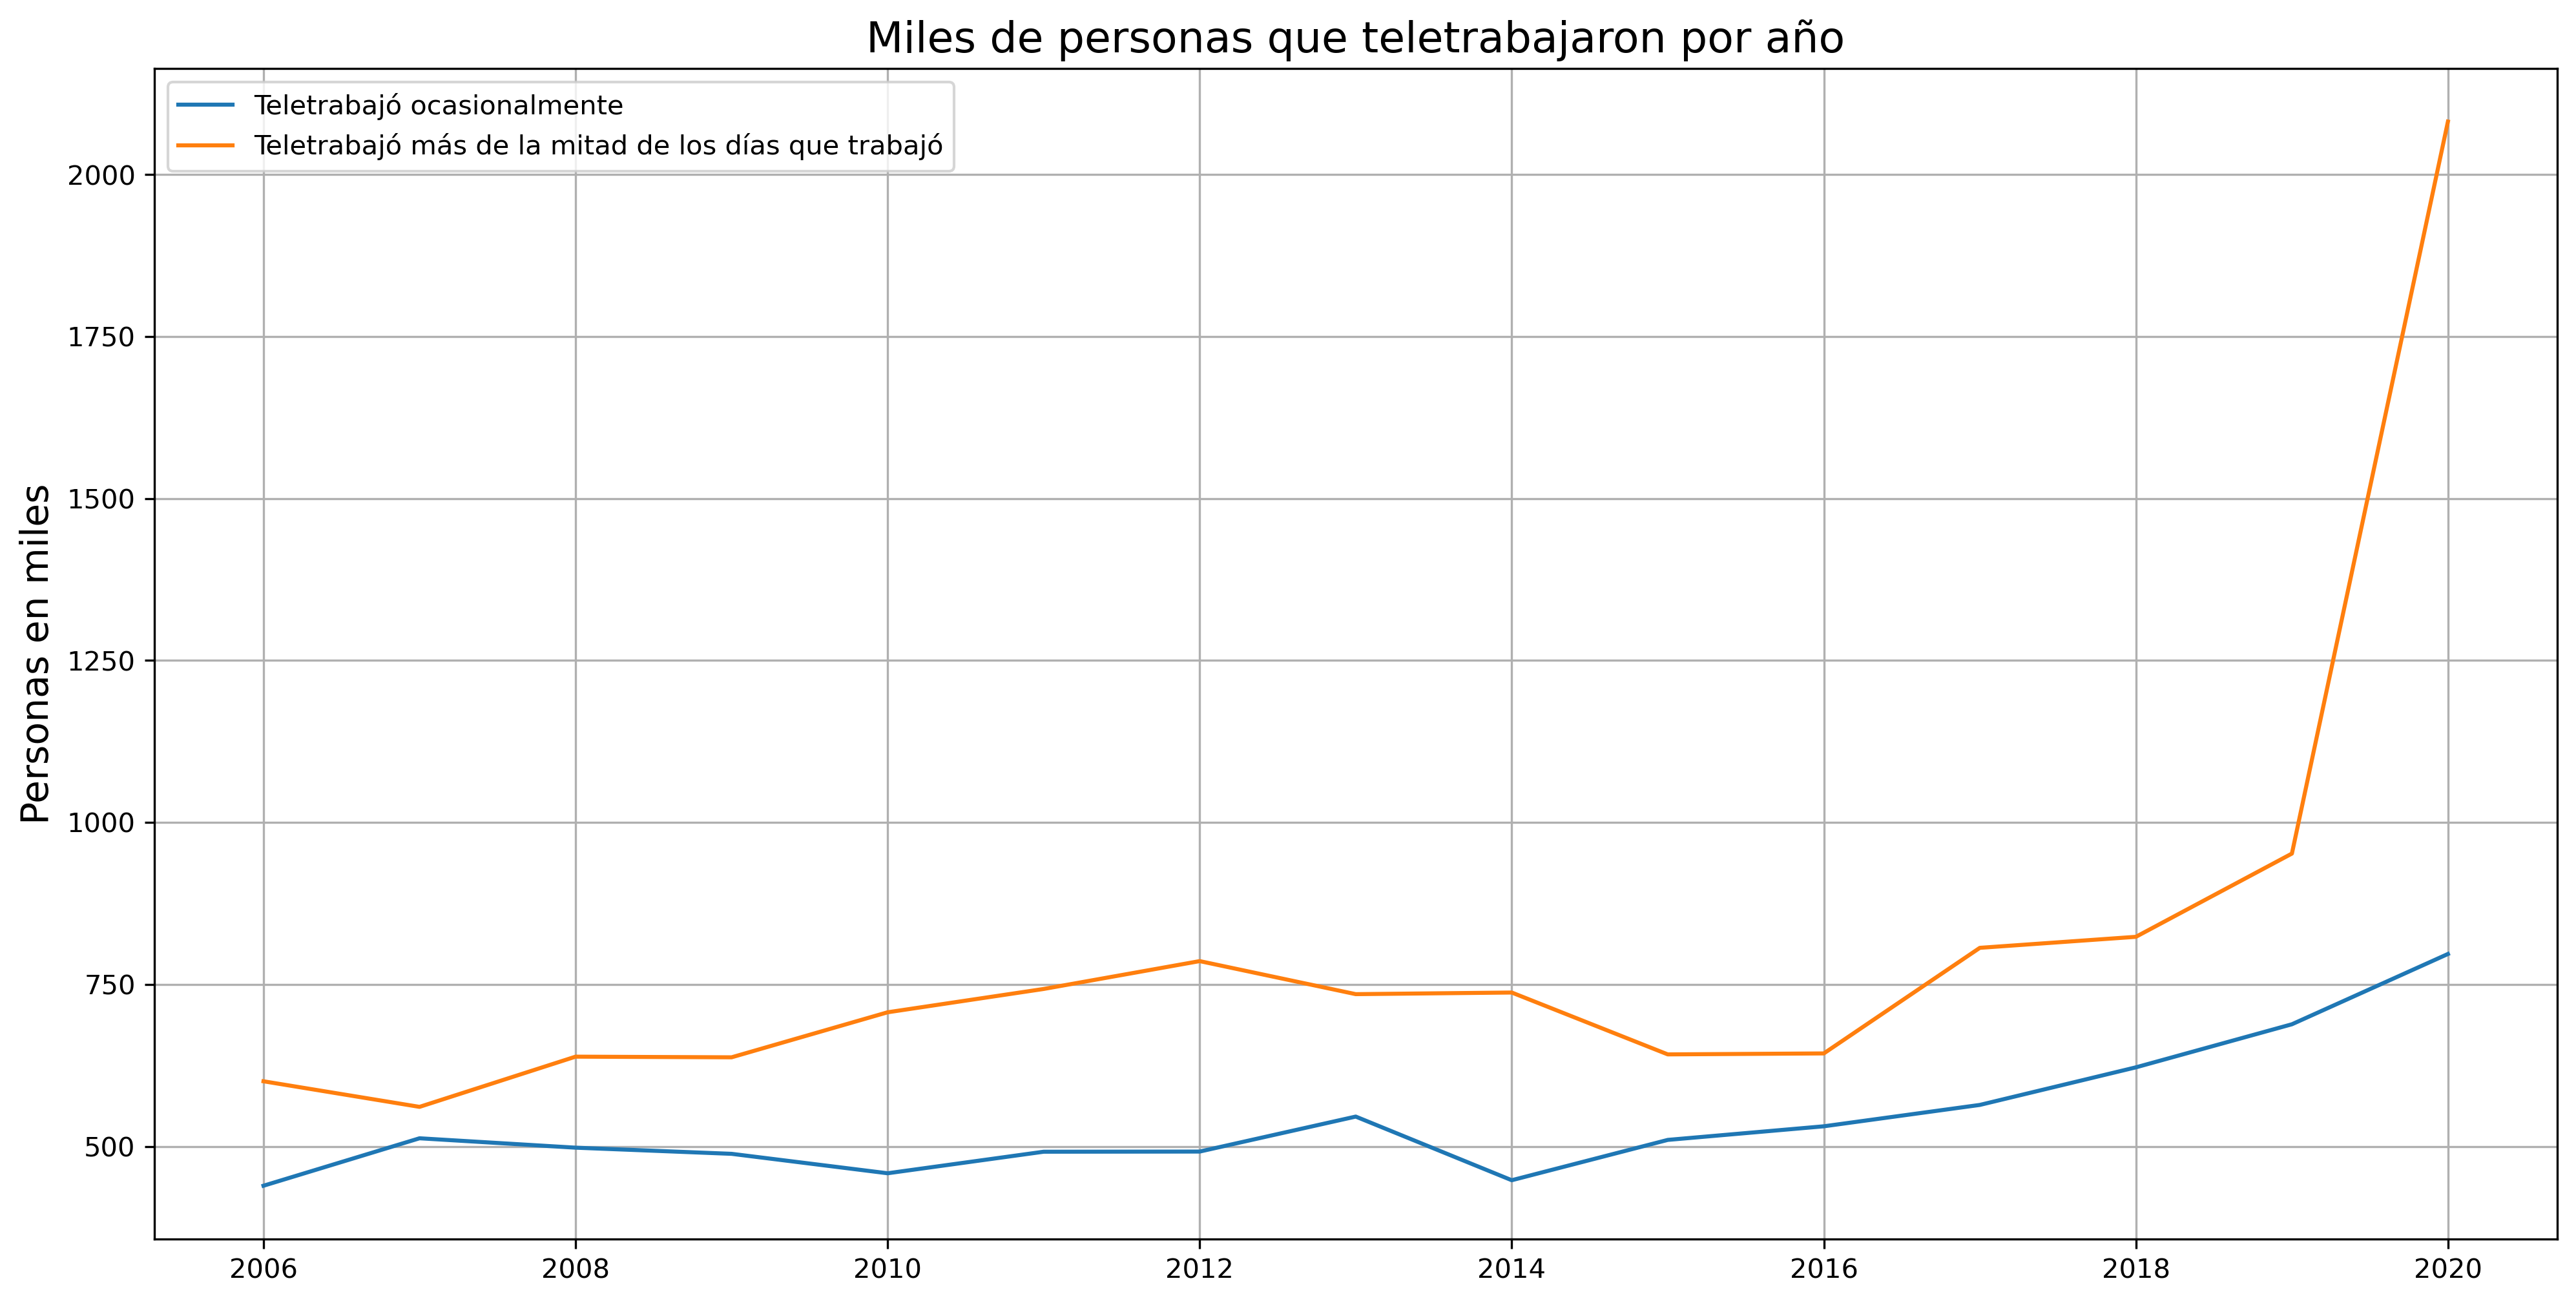

In [10]:
# Create figure
plt.figure(figsize=(16, 8), dpi=300)

# Plot data
plt.plot("Periodo", "Personas", data=ocasional, label="Teletrabajó ocasionalmente")
plt.plot("Periodo", "Personas", data=mas, label="Teletrabajó más de la mitad de los días que trabajó")

# Add title and label for y-axis
plt.title("Miles de personas que teletrabajaron por año", fontsize=16)
plt.ylabel("Personas en miles", fontsize=14)

# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()